In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# **PageRank:  _The Math Behind Google Search_**

---

**Abstract**

This project explores and explain the **mathematics** behind the algorithm, implements it step by step using **Python**, and visualizes how different web structures influence the final rankings. Along the way, I highlight the elegance of applying **eigenvectors**, **stochastic matrices**, and the **random surfer model** to real-world problems. By demystifying PageRank, we gain insight into the intersection of **math**, **data**, and the **internet**.

---

 ## **Why PageRank algorithm important?**

**PageRank** was created to tacke the difficulty of determing the importance of web pages with immense amount of information available.It's one of the first real-world algorithms to show how *mathematics and graph theory* can be used to navigate the complex structure of the web. It also demonstrates how pure math can have massive practical impact — affecting **billions of users** every day.The purpose of the algorithm is to provide better search results that are more precise and related by taking into account various factors beyond just matching keywords. Understanding **PageRank** gives us a deeper appreciation for applied mathematics in data science, search engines, recommendation systems, and network analysis.

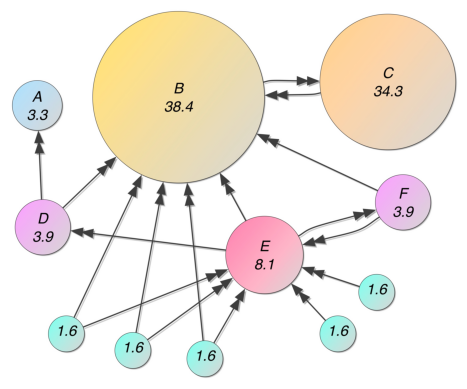

In [114]:
img = mpimg.imread('./pageranks-example.png') 
plt.imshow(img)
plt.axis('off') 
plt.show()

You can check histogram of this schema to understand more **->**

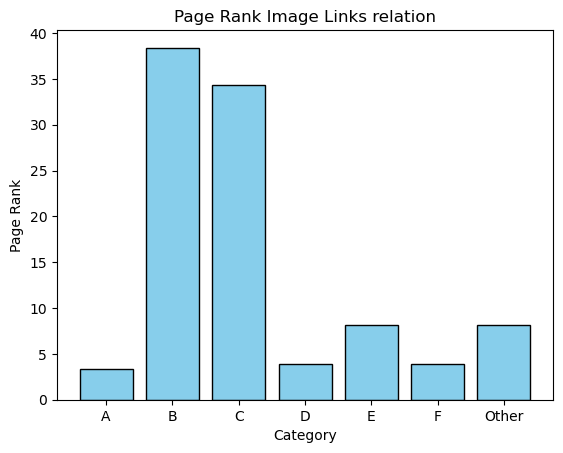

In [119]:
# Here I create categories array and mock data for the categories of the shema and at the bottom you can see result in histogram.
categories = ['A', 'B', 'C', 'D','E','F','Other']
frequencies = [3.3, 38.4, 34.3, 3.9,8.1,3.9,8.1]

plt.bar(categories, frequencies, color='skyblue', edgecolor='black')

plt.xlabel('Category')
plt.ylabel('Page Rank')
plt.title('Page Rank Image Links relation')

plt.show()

---

## **The Problem of Web Search Before PageRank?**

Before Google and the introduction of PageRank, web search engines struggled to deliver high-quality, relevant results. As the internet rapidly expanded during the 1990s, the number of web pages grew into the millions, then billions — but search technology failed to keep up with that growth in a meaningful way.Most early search engines (like AltaVista, Lycos, and Excite) relied heavily on simple keyword matching to retrieve results. They would look for pages that contained the same words as the user's query, and rank them based on factors like:
frequency of the keyword,location of the keyword,basic metadata,while this approach was easy to implement, it had major weaknesses:it was easy to manipulate ,It treated all pages as equally trustworthy or important and it didn’t consider how humans value content — through references and links.There was no good way to determine which pages were actually important or trustworthy. A personal blog and a university website could rank equally if they both mentioned the same keywords.This meant that relevance and quality often suffered.Search engines needed a way to filter spammy or low-quality pages,highlight content that was trusted or referenced by others,deliver more objective and useful results for users
.This set the stage for a fundamentally new idea: using link structure to infer page importance — the idea behind **PageRank**.

---

## **History of PageRank**

A search engine called **RankDex** from IDD Information Services, designed by **Robin Li** in 1996, developed a strategy for site-scoring and page-ranking.It was one of the first search engines to use link analysis-which is ranking the popularity of a web site based on how many other sites had linked to it for ranking pages meaning it also considered hyperlink structure, not just keywords.It is called **RankDex** and it was launched in 1996.**Li** filed a patent for the technology in **RankDex** in 1997.He later used it when he founded **Baidu** in China in 2000.Google founder **Larry Page** referenced Li's work as a citation in some of his U.S. patents for **PageRank**.

**Larry Page** and **Sergey Brin** developed **PageRank** at Stanford University in 1996 as part of a research project about a new kind of search engine. Sergey Brin had the idea that information on the web could be ordered in a hierarchy by link popularity-a page ranks higher as there are more links to it.The system was developed with the help of Scott Hassan and Alan Steremberg, both of whom were cited by Page and Brin as being critical to the development of Google. Rajeev Motwani and Terry Winograd co-authored with Page and Brin the first paper about the project, describing **PageRank** and the initial prototype of the [Google search engine](https://en.wikipedia.org/wiki/Google_Search), published in 1998.
> 📜 [*The Anatomy of a Large-Scale Hypertextual Web Search Engine*](http://infolab.stanford.edu/pub/papers/google.pdf)

While just nowadays has many factors that determine the ranking of Google search results, **PageRank** continues to provide the basis for all of Google's web-search tools.The name **PageRank** plays on the name of developer **Larry Page**, as well as of the concept of a web page.The word is a trademark of Google, and the **PageRank** process has been patented assigned to Stanford University and not to Google.Google has exclusive license rights on the patent from Stanford University. The university received 1.8 million shares of Google in exchange for use of the patent.It sold the shares in 2005 for $336 million.

## 📜 Timeline: Evolution of Web Search and the Birth of PageRank
---
### 🕰️ Web Search Evolution Timeline

| Year | Milestone | Description |
|------|-----------|-------------|
| **1994** | **AltaVista** | One of the first popular full-text web search engines. Used keyword-based ranking. Powerful, but easily manipulated and not very relevant for many queries. |
| **1996** | **RankDex (Robin Li)** | Introduced the idea of ranking pages based on link analysis. RankDex used the link structure of the web as a signal of relevance—an idea that directly influenced PageRank. |
| **1998** | **PageRank (Page & Brin)** | Developed at Stanford, PageRank formalized a mathematical model using a random surfer and eigenvector centrality to rank web pages based on link authority. |
| **1998** | **Google Founded** | Built on the foundation of PageRank, Google launched with the promise of more relevant and authoritative search results. This approach soon revolutionized the web. |


---

## 🧾 Key Insights from “The Anatomy of a Large-Scale Hypertextual Web Search Engine” (1998)

As I mentioned a little while ago in 1998, Larry Page and Sergey Brin published a paper titled "**The Anatomy of a Large-Scale Hypertextual Web Search Engine.**" This work introduced **Google** to the world and laid the foundation for modern web search engines. At the heart of their prototype was a novel ranking algorithm called **PageRank**, which changed the way search results were ordered on the web.

**In this section, we will introduce you to the most important things from fondational paper.**

Part of their abstract theiy said:

> *“Apart from the problems of scaling
traditional search techniques to data of this magnitude, there are new technical challenges involved
with using the additional information present in hypertext to produce better search results. This
paper addresses this question of how to build a practical large-scale system which can exploit the
additional information present in hypertext. Also we look at the problem of how to effectively deal
with uncontrolled hypertext collections where anyone can publish anything they want.”*

This is their introduction of the project they made:
> *“
The web creates new challenges for information retrieval. The amount of information on the web is
growing rapidly, as well as the number of new users inexperienced in the art of web research. People are
likely to surf the web using its link graph, often starting with high quality human maintained indices
such as Yahoo! or with search engines. Human maintained lists cover popular topics effectively but are
subjective, expensive to build and maintain, slow to improve, and cannot cover all esoteric topics.
Automated search engines that rely on keyword matching usually return too many low quality matches.
To make matters worse, some advertisers attempt to gain people’s attention by taking measures meant to
mislead automated search engines. We have built a large-scale search engine which addresses many of
the problems of existing systems. It makes especially heavy use of the additional structure present in
hypertext to provide much higher quality search results. We chose our system name, Google, because it
is a common spelling of googol, or 10100 and fits well with our goal of building very large-scale search
engines.”*

Their words about making **PageRank** Algorithm:
> *“Creating a search engine which scales even to today’s web presents many challenges. Fast crawling
technology is needed to gather the web documents and keep them up to date. Storage space must be used
efficiently to store indices and, optionally, the documents themselves. The indexing system must process
hundreds of gigabytes of data efficiently. Queries must be handled quickly, at a rate of hundreds to
thousands per second.
These tasks are becoming increasingly difficult as the Web grows. However, hardware performance and
cost have improved dramatically to partially offset the difficulty. There are, however, several notable
exceptions to this progress such as disk seek time and operating system robustness. In designing Google,
we have considered both the rate of growth of the Web and technological changes. Google is designed to
scale well to extremely large data sets. It makes efficient use of storage space to store the index. Its data
structures are optimized for fast and efficient access (see section 4.2). Further, we expect that the cost to
index and store text or HTML will eventually decline relative to the amount that will be available (see
Appendix B). This will result in favorable scaling properties for centralized systems like Google.”*

Here you can see their **Design Goals**:
> *“Our main goal is to improve the quality of web search engines. In 1994, some people believed that a
complete search index would make it possible to find anything easily. According to Best of the Web
1994 -- Navigators, "The best navigation service should make it easy to find almost anything on the
Web (once all the data is entered)." However, the Web of 1997 is quite different. Anyone who has used
a search engine recently, can readily testify that the completeness of the index is not the only factor in
the quality of search results. "Junk results" often wash out any results that a user is interested in. In fact,
as of November 1997, only one of the top four commercial search engines finds itself (returns its own
search page in response to its name in the top ten results). One of the main causes of this problem is that
the number of documents in the indices has been increasing by many orders of magnitude, but the user’s
ability to look at documents has not. People are still only willing to look at the first few tens of results.
Because of this, as the collection size grows, we need tools that have very high precision (number of
relevant documents returned, say in the top tens of results). Indeed, we want our notion of "relevant" to
only include the very best documents since there may be tens of thousands of slightly relevant
documents. This very high precision is important even at the expense of recall (the total number of
relevant documents the system is able to return). There is quite a bit of recent optimism that the use of
more hypertextual information can help improve search and other applications \[Marchiori 97\] \[Spertus
97\] \[Weiss 96\] \[Kleinberg 98\]. In particular, link structure \[Page 98\] and link text provide a lot of
information for making relevance judgments and quality filtering. Google makes use of both link
structure and anchor text (see Sections 2.1 and 2.2).
Another important design goal was to build systems that reasonable numbers of people can actually use.
Usage was important to us because we think some of the most interesting research will involve
leveraging the vast amount of usage data that is available from modern web systems. For example, there
are many tens of millions of searches performed every day. However, it is very difficult to get this data,
mainly because it is considered commercially valuable.
Our final design goal was to build an architecture that can support novel research activities on
large-scale web data. To support novel research uses, Google stores all of the actual documents it crawls
in compressed form. One of our main goals in designing Google was to set up an environment where
other researchers can come in quickly, process large chunks of the web, and produce interesting results
that would have been very difficult to produce otherwise. In the short time the system has been up, there
have already been several papers using databases generated by Google, and many others are underway.
Another goal we have is to set up a Spacelab-like environment where researchers or even students can
propose and do interesting experiments on our large-scale web data. 
> ”*





## **Why PageRank Was Revolutionary?**


How i mentonied before most search engines focused only on matching words, not on evaluating the importance of pages.PageRank introduced a completely new way of thinking about web pages. Instead of treating every page as equal, it looked at how other pages linked to it.
A page is important if important pages link to it.
The PageRank algorithm is based on the idea of a **"random surfer"** — someone who starts on a web page and randomly follows links.
Sometimes they click a link on the page or get bored and jump to a random new page.
By simulating this behavior across the web, PageRank calculates the steady-state probability of landing on any given page. That value becomes the page’s ranking score.



## **How does PageRank work?**
To illustrate how **PageRank** works i will show famous way of explanation.

Let's use players in a football match:

- each player represent a page

- each pass between two players represent a link between 2 pages



<center>
    <img src="https://thumbs.dreamstime.com/b/vector-soccer-field-arrangement-players-game-position-title-football-player-green-field-template-vector-119751372.jpg" alt="Image of football field with red points for player" width="300" height="200">
</center>

The main thing PageRank uses are:
  - The number of links the page gets(in football context how many pass player recieves).
    
  - The importance of a page is determined by the number of links pointing towards it by how frequently the player who passed the ball is passed to.
The **PageRank** of each player gets updated every time they receive the ball.

<center>
    <img src="https://thumbs.dreamstime.com/b/vector-soccer-field-arrangement-players-game-position-title-football-player-green-field-template-vector-119751372.jpg" alt="Image of football field with red points for player" width="300" height="200">
</center>

- As more passes are made ,the PageRank of each player undergoes changes.

- As a result ,the **PageRank** of every player they pass will be altered.

- The higher number it's better.

- Once game concludes,players can be **sorted** by their rating and be **ranked** to determine the best performer!


In [ ]:
As this very simple explanation we hover the main idea of PageRank Algorithm!

---

## **Algorithm**

The PageRank algorithm outputs a probability distribution used to represent the likelihood that a person randomly clicking on links will arrive at any particular page. PageRank can be calculated for collections of documents of any size. It is assumed in several research papers that the distribution is evenly divided among all documents in the collection at the beginning of the computational process. The PageRank computations require several passes, called "iterations", through the collection to adjust approximate PageRank values to more closely reflect the theoretical true value.

A probability is expressed as a numeric value between 0 and 1. A 0.5 probability is commonly expressed as a "50% chance" of something happening. Hence, a document with a PageRank of 0.5 means there is a 50% chance that a person clicking on a random link will be directed to said document.


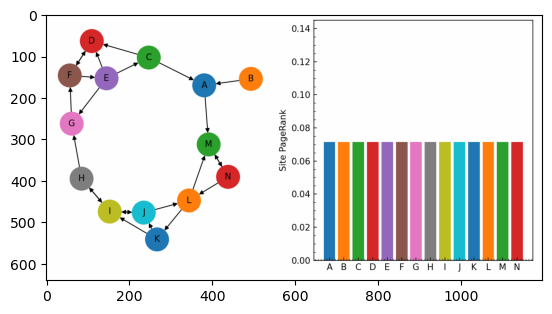

In [32]:
gif = mpimg.imread('./Page_rank_animation.gif')
plt.imshow(gif)
plt.show()

### Simplified Algorithm

Lets have small universe of four web pages: **A**, **B**, **C**, and **D**. Links from a page to itself are ignored. Multiple outbound links from one page to another page are treated as a single link. **PageRank** is initialized to the same value for all pages. In the original form of **PageRank**, the sum of **PageRank** over all pages is the total number of pages on the web at that time.However, later versions of **PageRank**, and the remainder of this section, assume a probability distribution between **0** and **1**. Hence the initial value for each page in this example is **0.25**.

The PageRank transferred from a given page to the targets of its outbound links upon the next iteration is divided equally among all outbound links.

If the only links in the system were from pages **B**, **C**, and **D** to **A**, each link would transfer **0.25** PageRank to **A** upon the next iteration, for a total of 0.25 + 0.25 + 0.25 = **0.75**.

$$ PR(A) = PR(B) + PR(C) + PR(D). $$

Instead in our example page **B** had a link to pages **C** and **A**, page **C** had a link to page **A**, and page **D** had links to all three pages. In the first iteration, page **B** would transfer half of its existing value **(0.125)** to page **A** and the other half **(0.125)** to page **C**. Page **C** would transfer all of its existing value **(0.25)** to the only page it links to, **A**. Since **D** had three outbound links, it would transfer one third of its existing value, or approximately **0.083**, to **A**. At the completion of this iteration, page **A** will have a PageRank of approximately **0.458**.

$$ PR(A) = \frac{PR(B)}{2} + \frac{PR(C)}{1} + \frac{PR(D)}{3}. $$

In other words, the PageRank conferred by an outbound link is equal to the document's own PageRank score divided by the number of outbound links **L( )**.

$$ PR(A) = \frac{PR(B)}{L(B)} + \frac{PR(C)}{L(C)} + \frac{PR(D)}{L(D)}. $$

In general case PageRank value for a page u is dependent on the PageRank values for each page **v** contained in the set **Bu** (the set containing all pages linking to page **u**), divided by the number **L(v)** of links from page **v**.

$$ PR(u) = \sum_{v \in B_u} \frac{PR(V)}{L(V)} $$

## Dumping Factor

The **PageRank theory** holds that an imaginary surfer who is randomly clicking on links will eventually stop clicking. The probability, at any step, that the person will continue following links is a damping factor **d**. The probability that they instead jump to any random page is **1 - d**. Various studies have tested different damping factors, but it is generally assumed that the damping factor will be set around **0.85**.

The damping factor is subtracted from 1 (and in some variations of the algorithm, the result is divided by the number of documents (N) in the collection) and this term is then added to the product of the damping factor and the sum of the incoming PageRank scores.

$$ PR(A) = \frac{1-d}{N} + d(\frac{PR(B)}{L(B)} + \frac{PR(C)}{L(C)} + \frac{PR(D)}{L(D)} + \cdots). $$

$$  PR(A) = \frac{1-d}{N} + d\left(\frac{PR(B)}{L(B)} + \frac{PR(C)}{L(C)} + \frac{PR(D)}{L(D)} + \cdots \right) $$

The damping factor adjusts the derived value downward. The original paper, however, gave the following formula, which has led to some confusion:

$$  PR(A) = 1-d + d\left(\frac{PR(B)}{L(B)} + \frac{PR(C)}{L(C)} + \frac{PR(D)}{L(D)} + \cdots \right) $$

The difference between them is that the PageRank values in the first formula sum to one, while in the second formula each PageRank is multiplied by N and the sum becomes N. A statement in Page and Brin's paper that the sum of all PageRanks is one and claims by other Google employees support the first variant of the formula above.

Page and Brin confused the two formulas in their most popular paper "The Anatomy of a Large-Scale Hypertextual Web Search Engine", where they mistakenly claimed that the second formula formed a probability distribution over web pages.

Google recalculates PageRank scores each time it crawls the Web and rebuilds its index. As Google increases the number of documents in its collection, the initial approximation of PageRank decreases for all documents.

The formula uses a model of a random surfer who reaches their target site after several clicks, then switches to a random page. The PageRank value of a page reflects the chance that the random surfer will land on that page by clicking on a link. It can be understood as a **Markov chain** in which the **states** are **pages**, and the **transitions** are the **links** between pages – all of which are all equally probable.

If a page has no links to other pages, it becomes a **sink** and therefore terminates the random surfing process. If the random surfer arrives at a sink page, it picks another URL at random and continues surfing again.

When calculating PageRank, pages with no outbound links are assumed to link out to all other pages in the collection. Their PageRank scores are therefore divided evenly among all other pages. In other words, to be fair with pages that are not sinks, these random transitions are added to all nodes in the Web. This residual probability, **d**, is usually set to **0.85**, estimated from the frequency that an average surfer uses his or her browser's bookmark feature. So, the equation is as follows:

$$  PR(pi\text) = \frac{1-d}{N} \sum_{pj \in M(pi\text)} \frac{PR(pi\text)}{L(pi\text)} $$

where $ p_1,p_2,...,p_n$ are pages under consideration,$ M(pi\text)$ is the set of pages that link $ pi\text ,L(pi\text)$ is the number of outbond links on page $ p_j$ , and **N** is the total number of pages.

The PageRank values are the entries of the dominant right eigenvector of the modified adjacency matrix rescaled so that each column adds up to one. 

$$ R = \begin{bmatrix}
PR(p_1) \\
PR(p_2)  \\
\vdots  \\
PR(p_N)
\end{bmatrix}$$

where **R** is the solution of the equtation

$$ R=\begin{bmatrix}
(d-1)/N \\
(d-1)/N \\
\vdots  \\
(d-1)/N
\end{bmatrix} + d\begin{bmatrix}\ell(p_1,p_1) & \ell(p_1,p_2) & \cdots &  \ell(p_1,p_N)\\ 
\ell(p_2,p_1) & \ddots &  \space & \vdots  \\
\vdots & \space & \ell(p_i,p_j) & \space \\
\ell(p_N,p_1) & \cdots & \space & \ell(p_2,p_1)  \end{bmatrix}R$$

where adjency function $ \ell(p_i,p_j)$ is the ratio between number of links outbound from page **j** to page **i** to the total number of outbound links of the page **j**.The adjency function is 0 if page $p_j$ does not link $ p_i$,and normalized that for each j:

$$ \sum_{i=0}^{N} \ell(p_i,p_j) = 1 $$

Elements of each columns is sum to **1**,so matrix is a **stochastic metod**.It's a variant of **eigenvector** centrality measure used commonly in network analysis.Because of the large **eigengap** of the modified adjacency matrix above,the values of the PageRank eigenvector can be approximated to within a high degree of accuracy within only a few iterations.

Through this data, they concluded the algorithm can be scaled very well and that the scaling factor for extremely large networks would be roughly linear in 
$\log n$ where **n** is the size of the network.

As a result of **Markov Theory**,it can be shown that **PageRank** of a page is the probability of arriving at that page after a large number of clicks.This happens to equal $t^-1$ where $t$ is the expectation of the number of clicks(or random jumps) required to get from the page back to itself.  

One main disadvantage of PageRank is that it favors older pages. A new page, even a very good one, will not have many links unless it is part of an existing site